<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Lab6_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Imports
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task 1: Creating the single layer perceptron (3 points)

In this lab we will focus on the perceptron, and how it can be used to model logic gates. Further, this same idea can be extended further due to perceptrons being a universal function approximator

**Implement the `sigmoid` function** *(1 point)*

$𝑆(x) = \frac{1}{1 + e^{-x}}$



In [3]:
def sigmoid(x):
  '''
    Applies the sigmoid function to the given input

    Parameters
    ----------
    x: torch.Tensor
        Input array/tensor

    Returns
    -------
    out: torch.Tensor
        Tensor after applying sigmoid function to it
  '''
  res = torch.sigmoid(x)
  return res

a = torch.randn ((4, 4, 4))
sigmoid(a)

tensor([[[0.2887, 0.3483, 0.8267, 0.8074],
         [0.6564, 0.4792, 0.5701, 0.3187],
         [0.5042, 0.5363, 0.6165, 0.7264],
         [0.3062, 0.7862, 0.1944, 0.6522]],

        [[0.3442, 0.8175, 0.6334, 0.3743],
         [0.4645, 0.4702, 0.3596, 0.2221],
         [0.5474, 0.7317, 0.6512, 0.3287],
         [0.2402, 0.8818, 0.8246, 0.7449]],

        [[0.0805, 0.1734, 0.2513, 0.5652],
         [0.2107, 0.4451, 0.2970, 0.7690],
         [0.0574, 0.9096, 0.8229, 0.2849],
         [0.3343, 0.4878, 0.6732, 0.7849]],

        [[0.8053, 0.4873, 0.8609, 0.2626],
         [0.6049, 0.6855, 0.8187, 0.2202],
         [0.3440, 0.2846, 0.5240, 0.4090],
         [0.5635, 0.8380, 0.5633, 0.2133]]])

**Implement the `perceptron` function** *(1 point)*

$y' = x \bullet W^t + b$

In [4]:
def perceptron(inputs, weights, bias):

  '''
    Defines the single layer perceptron model
  '''
  return sigmoid(inputs@(weights.T)+bias)
  

**Implement the `binary_cross_entropy` function** *(1 point)*

$\mathrm{Loss} = - \frac{1}{\mathrm{N}} \sum_{i=1}^{\mathrm{N}} y_i \cdot \mathrm{log}\; {\hat{y}}_i + (1-y_i) \cdot \mathrm{log}\; (1-{\hat{y}}_i)$

In [5]:
def binary_cross_entropy(preds, targets):
  '''
    Applies binary cross entropy given predictions and ground truth
  '''
  loss =  torch.nn.BCELoss()
  return loss(preds, targets)

## AND Gate

In [7]:
and_data = np.array([[0,0,0],
                     [0,1,0],
                     [1,0,0],
                     [1,1,1]])

# Creating a PyTorch tensor
and_data = torch.Tensor(and_data)

In [8]:
# Same slicing as np arrays
X = and_data[:,:-1]
y = and_data[:,-1:]

In [9]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)
print(X.shape); print(W.T.shape)
print(perceptron(X, W, b))

torch.Size([4, 2])
torch.Size([2, 1])
tensor([[0.7433],
        [0.9290],
        [0.6535],
        [0.8949]], grad_fn=<SigmoidBackward0>)


**Create the training loop** *(1 point)*

tensor([[0],
        [0],
        [0],
        [1]], dtype=torch.int32)


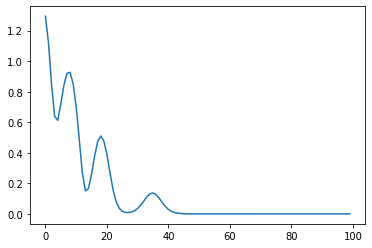

In [10]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # Get predictions
  y_pred=perceptron(X,W,b)
  # Calculate Loss
  loss=binary_cross_entropy(y_pred, y)
  
  # Do a backward step (to calculate gradients)
  loss.backward()

  # Update Weights
  with torch.no_grad():
    W-= (lr*W.grad)
    b-= (lr*b.grad) 
  W.requires_grad=True
  b.requires_grad=True
  # Append Loss
  losses.append(float(loss))

plt.plot(losses)

with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

## OR Gate

In [12]:
or_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,1]])

# Creating a PyTorch tensor
or_data = torch.Tensor(or_data)

In [13]:
# Same slicing as np arrays
X = or_data[:,:-1]
y = or_data[:,-1:]

In [14]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [15]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # Get predictions
  y_pred=perceptron(X,W,b)

  # Calculate Loss
  loss=binary_cross_entropy(y_pred, y)
  
  # Do a backward step (to calculate gradients)
  loss.backward()

  # Update Weights
  with torch.no_grad():
    W-= (lr*W.grad)
    b-= (lr*b.grad) 
  W.requires_grad=True
  b.requires_grad=True
  # Append Loss
  losses.append(float(loss))


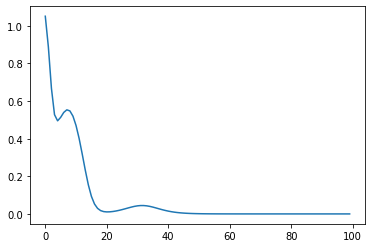

In [16]:
plt.plot(losses)

In [17]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[0],
        [1],
        [1],
        [1]], dtype=torch.int32)


## XOR Gate

In [18]:
xor_data = np.array([[0,0,0],
                     [0,1,1],
                     [1,0,1],
                     [1,1,0]])

# Creating a PyTorch tensor
xor_data = torch.Tensor(xor_data)

In [19]:
# Same slicing as np arrays
X = xor_data[:,:-1]
y = xor_data[:,-1:]

In [20]:
W = torch.randn((1,2), requires_grad=True)
b = torch.randn((1,1), requires_grad=True)

**Reuse the training loop**

In [21]:
n_epochs = 100
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # Get predictions
  y_pred=perceptron(X,W,b)
  # Calculate Loss
  loss=binary_cross_entropy(y_pred, y)
  
  # Do a backward step (to calculate gradients)
  loss.backward()

  # Update Weights
  with torch.no_grad():
    W-= (lr*W.grad)
    b-= (lr*b.grad) 
  W.requires_grad=True
  b.requires_grad=True
  # Append Loss
  losses.append(float(loss))

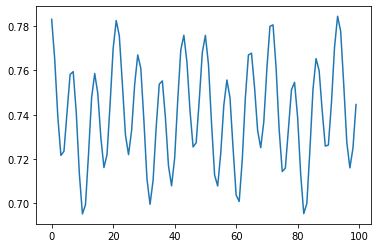

In [22]:
plt.plot(losses)

In [23]:
with torch.no_grad():
  print((perceptron(X, W, b) > 0.5).int())

tensor([[1],
        [0],
        [0],
        [0]], dtype=torch.int32)


## Need for MLP

As seen above, we are unable to model the XOR gate using a single layer perceptron, so we need to add a hidden layer.

In [24]:
W1 = torch.randn((10,2), requires_grad=True)
W2 = torch.randn((1,10), requires_grad=True)
b1 = torch.randn((1,10), requires_grad=True)
b2 = torch.randn((1,1), requires_grad=True)

**Implement the `mlp` function** *(1 point)*

In [27]:
def mlp(inputs, W1, W2, b1, b2):

  '''
    Defines the multi-layer perceptron model

    Note: Only 1 hidden layer
  '''
  y_hidden=perceptron(inputs, W1, b1)
  y_layer2=perceptron(y_hidden, W2, b2)
  return y_layer2

**Reuse the training loop**

NOTE: It will require slight modification due to the hidden layer

In [28]:
n_epochs = 1000
lr = 5e-1
losses = []
for _ in range(n_epochs):
  # Define the Training Loop here
  # Get predictions
  y_pred = mlp(X, W1, W2, b1, b2)

  # Calculate Loss
  loss = binary_cross_entropy(y_pred, y)

  # Do a backward step (to calculate gradients)
  loss.backward()
  
  # Update Weights'
  with torch.no_grad():
    W1-= lr*W1.grad
    b1-= lr*b1.grad
    W2-= lr*W2.grad
    b2-= lr*b2.grad
  
  W1.requires_grad= True
  W2.requires_grad= True
  b1.requires_grad= True
  b2.requires_grad= True

  # Append Loss
  losses.append(float(loss))

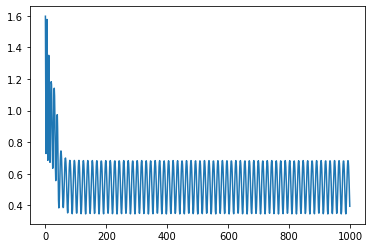

In [29]:
plt.plot(losses)

In [30]:
with torch.no_grad():
  print((mlp(X, W1, W2, b1, b2) > 0.5).int())

tensor([[0],
        [0],
        [1],
        [0]], dtype=torch.int32)
